In [53]:
import pandas as pd
df = pd.read_csv("C:/Users/Student/Documents/kaim documents/week 3/MachineLearningRating_v3/MachineLearningRating_v3.txt", delimiter='|')
df.info()
df.describe()
df.isnull().sum()

C:\Users\Student\AppData\Local\Temp\ipykernel_54964\329109963.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/Student/Documents/kaim documents/week 3/MachineLearningRating_v3/MachineLearningRating_v3.txt", delimiter='|')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [54]:
# Overview
print(df.shape)
print(df.dtypes)
print(df.isnull().sum())  # Check missing values

# Descriptive statistics
df[['TotalPremium', 'TotalClaims', 'CustomValueEstimate']].describe()


(1000098, 52)
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors 

,TotalPremium,TotalClaims,CustomValueEstimate
count,1.000098e+06,1.000098e+06,2.204560e+05
mean,6.190550e+01,6.486119e+01,2.255311e+05
std,2.302845e+02,2.384075e+03,5.645157e+05
min,-7.825768e+02,-1.200241e+04,2.000000e+04
25%,0.000000e+00,0.000000e+00,1.350000e+05
50%,2.178333e+00,0.000000e+00,2.200000e+05
75%,2.192982e+01,0.000000e+00,2.800000e+05
max,6.528260e+04,3.930921e+05,2.655000e+07


In [55]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['Gender'] = df['Gender'].astype('category')


In [56]:
import pandas as pd

# Make sure numeric columns are in the correct dtype
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce')
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce')
df['CustomValueEstimate'] = pd.to_numeric(df['CustomValueEstimate'], errors='coerce')

# Select columns of interest
cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

# Calculate statistics
stats = df[cols].agg(['mean', 'median', 'std', 'min', 'max']).transpose()

print(stats)


                              mean         median            std  \
TotalPremium             61.905496       2.178333     230.284513   
TotalClaims              64.861190       0.000000    2384.074695   
CustomValueEstimate  225531.129942  220000.000000  564515.749848   

                              min           max  
TotalPremium          -782.576754  6.528260e+04  
TotalClaims         -12002.412281  3.930921e+05  
CustomValueEstimate  20000.000000  2.655000e+07  


In [57]:
df['TotalPremium'].var()

np.float64(53030.95681602465)

In [58]:
# Calculate Loss Ratio
df = df[df['TotalPremium'].notna() & (df['TotalPremium'] > 0)]
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
# Overall
overall_loss_ratio = df['LossRatio'].mean()
print("Overall Loss Ratio:", overall_loss_ratio)

# By Province
print(df.groupby('Province')['LossRatio'].mean().sort_values())

# By VehicleType
print(df.groupby('VehicleType')['LossRatio'].mean().sort_values())

# By Gender
print(df.groupby('Gender')['LossRatio'].mean().sort_values())


Overall Loss Ratio: 0.3500476647582784
Province
Free State       0.106209
Northern Cape    0.203831
Eastern Cape     0.235636
KwaZulu-Natal    0.265328
North West       0.285348
Western Cape     0.341810
Limpopo          0.348712
Mpumalanga       0.392698
Gauteng          0.428927
Name: LossRatio, dtype: float64
VehicleType
Bus                  0.000000
Passenger Vehicle    0.337534
Medium Commercial    0.493386
Light Commercial     0.543917
Heavy Commercial     0.793617
Name: LossRatio, dtype: float64
Gender
Not specified    0.347932
Male             0.353258
Female           0.491979
Name: LossRatio, dtype: float64


C:\Users\Student\AppData\Local\Temp\ipykernel_54964\948878287.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Gender')['LossRatio'].mean().sort_values())


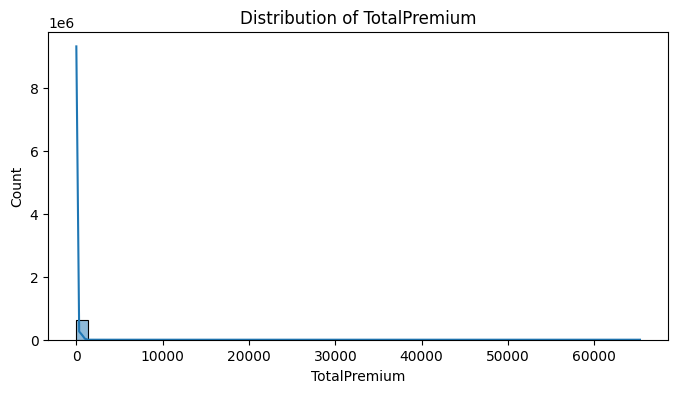

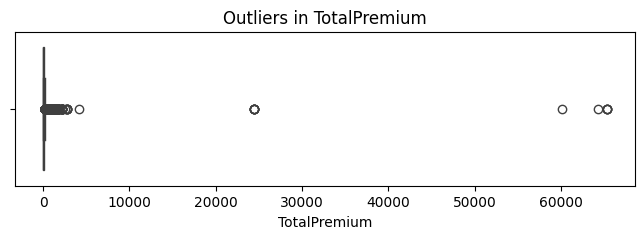

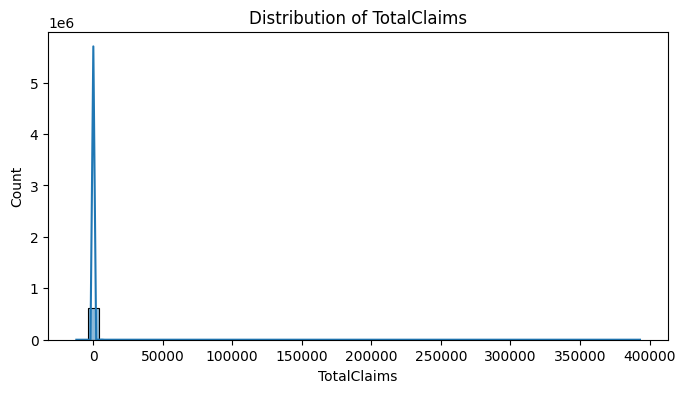

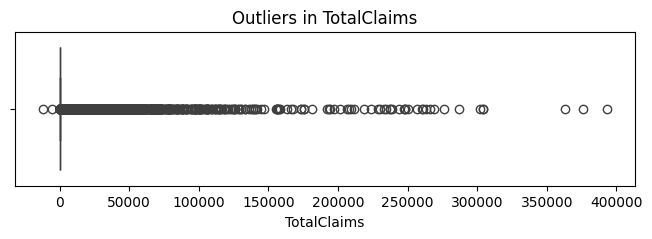

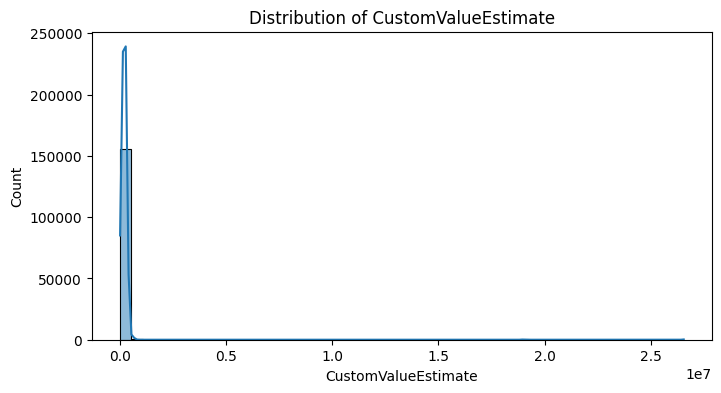

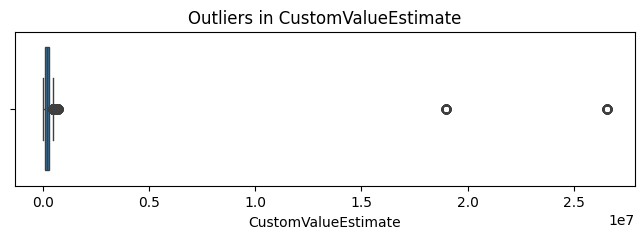

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']

for col in cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Student\AppData\Local\Temp\ipykernel_54964\3738465014.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_loss.index, y=province_loss.values, palette="viridis")


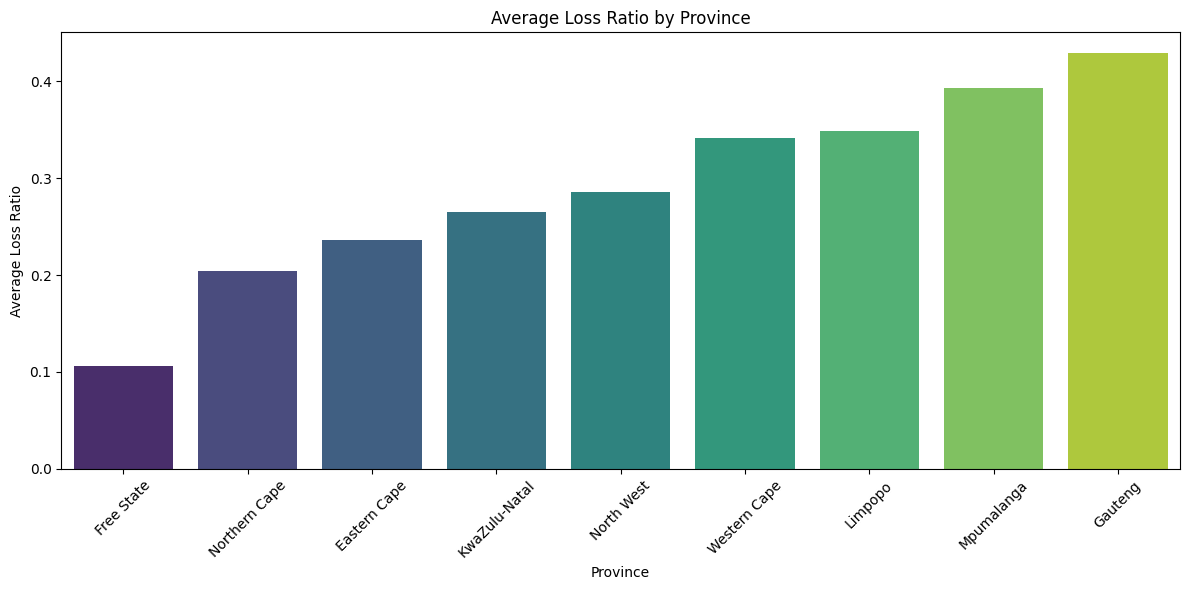

In [61]:
plt.figure(figsize=(12,6))
province_loss = df.groupby('Province')['LossRatio'].mean().sort_values()
sns.barplot(x=province_loss.index, y=province_loss.values, palette="viridis")
plt.xticks(rotation=45)
plt.title('Average Loss Ratio by Province')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Province')
plt.tight_layout()
plt.show()


C:\Users\Student\AppData\Local\Temp\ipykernel_54964\841918579.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_loss.index, y=vehicle_loss.values, palette="magma")


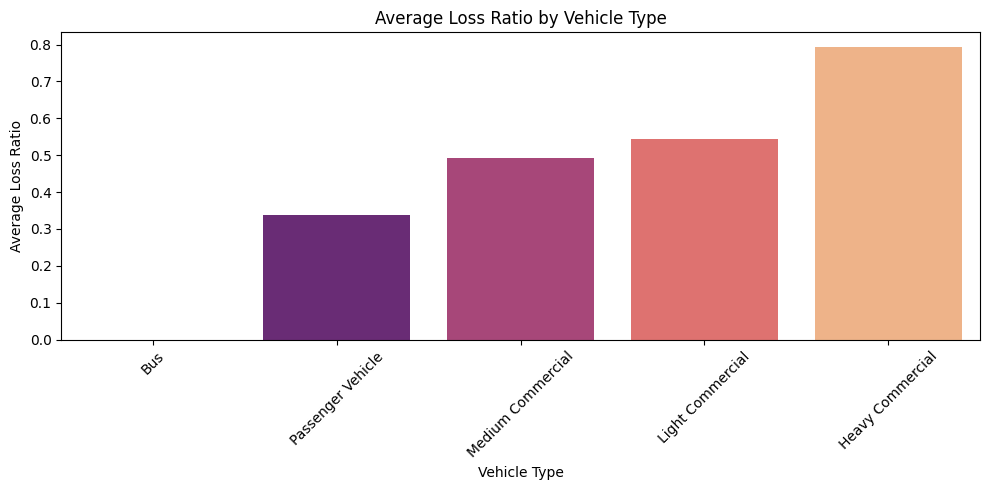

In [62]:
plt.figure(figsize=(10,5))
vehicle_loss = df.groupby('VehicleType')['LossRatio'].mean().sort_values()
sns.barplot(x=vehicle_loss.index, y=vehicle_loss.values, palette="magma")
plt.xticks(rotation=45)
plt.title('Average Loss Ratio by Vehicle Type')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Vehicle Type')
plt.tight_layout()
plt.show()


C:\Users\Student\AppData\Local\Temp\ipykernel_54964\1413966807.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_loss = df.groupby('Gender')['LossRatio'].mean().sort_values()
C:\Users\Student\AppData\Local\Temp\ipykernel_54964\1413966807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_loss.index, y=gender_loss.values, palette="pastel")


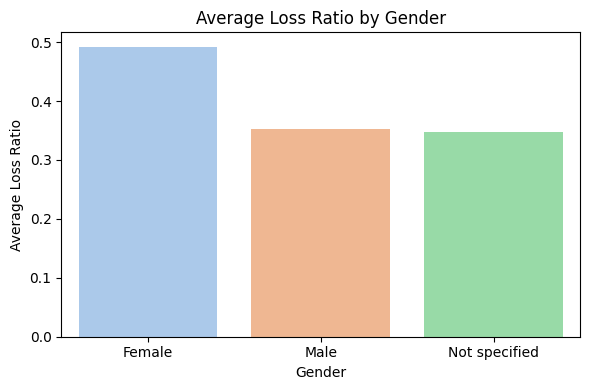

In [63]:
plt.figure(figsize=(6,4))
gender_loss = df.groupby('Gender')['LossRatio'].mean().sort_values()
sns.barplot(x=gender_loss.index, y=gender_loss.values, palette="pastel")
plt.title('Average Loss Ratio by Gender')
plt.ylabel('Average Loss Ratio')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


In [64]:
plt.savefig('loss_ratio_by_province.png')  # Use after plt.show() or instead of it

<Figure size 640x480 with 0 Axes>

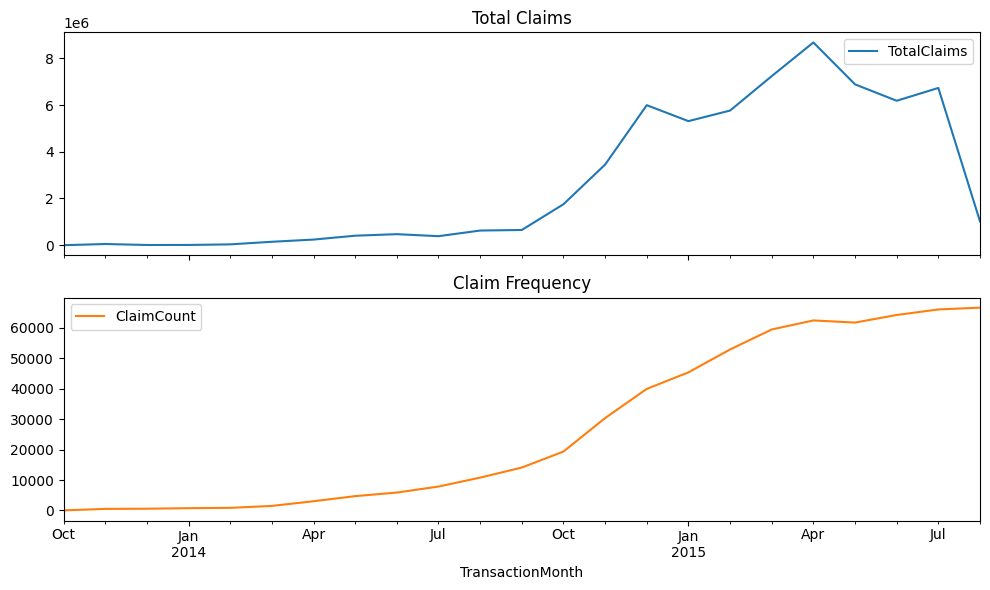

In [65]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Monthly trend of total claims
monthly = df.groupby('TransactionMonth').agg({
    'TotalClaims': 'sum',
    'PolicyID': 'count'  # proxy for frequency
})

monthly.rename(columns={'PolicyID': 'ClaimCount'}, inplace=True)

monthly.plot(subplots=True, figsize=(10, 6), title=['Total Claims', 'Claim Frequency'])
plt.tight_layout()
plt.show()


In [66]:
# Mean claim amount by vehicle make/model
claim_by_make = df.groupby('make')['TotalClaims'].mean().sort_values()
claim_by_model = df.groupby('Model')['TotalClaims'].mean().sort_values()

print("Top 5 lowest claim makes:\n", claim_by_make.head())
print("Top 5 highest claim makes:\n", claim_by_make.tail())

print("Top 5 lowest claim models:\n", claim_by_model.head())
print("Top 5 highest claim models:\n", claim_by_model.tail())


Top 5 lowest claim makes:
 make
CHEVROLET                              0.0
CITROEN                                0.0
CHERY                                  0.0
DAIHATSU                               0.0
GEELY                                  0.0
Name: TotalClaims, dtype: float64
Top 5 highest claim makes:
 make
POLARSUN                               230.992331
AUDI                                   272.746885
HYUNDAI                                376.189161
JMC                                    575.054386
SUZUKI                                 695.130857
Name: TotalClaims, dtype: float64
Top 5 lowest claim models:
 Model
YARIS T1 5Dr           0.0
50C15 F/C C/C          0.0
50 C13V 15M F/C P/V    0.0
50 C13D F/C D/C        0.0
50 C13 F/C C/C         0.0
Name: TotalClaims, dtype: float64
Top 5 highest claim models:
 Model
DUCATO 2.3 JTD VETRATO         1014.681021
320d (E90)                     1253.318881
VERSO 180 SX                   5222.270335
L/CRUISER FJ 4.0 V6 CRUISER    5340

Loss Ratio by Province:

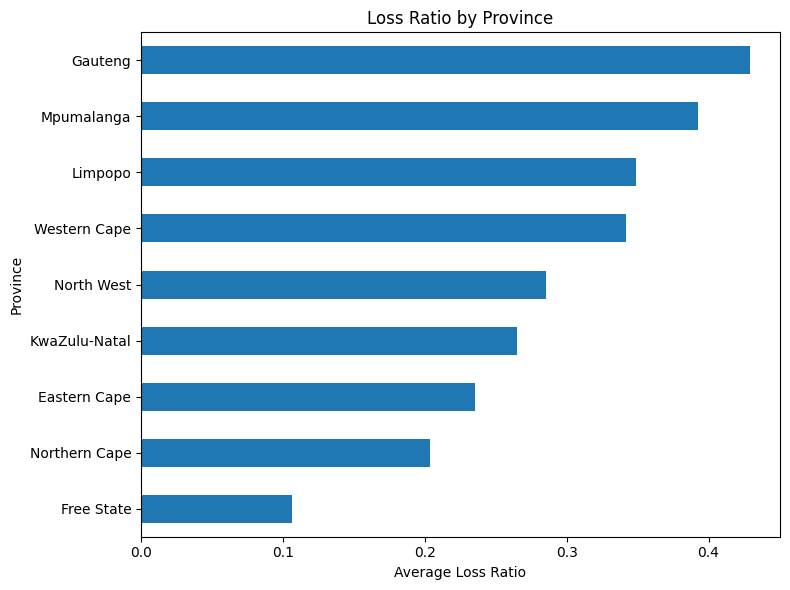

In [67]:
df.groupby('Province')['LossRatio'].mean().sort_values().plot(kind='barh', title='Loss Ratio by Province', figsize=(8,6))
plt.xlabel('Average Loss Ratio')
plt.tight_layout()
plt.show()


Trend of Claims Over Time:

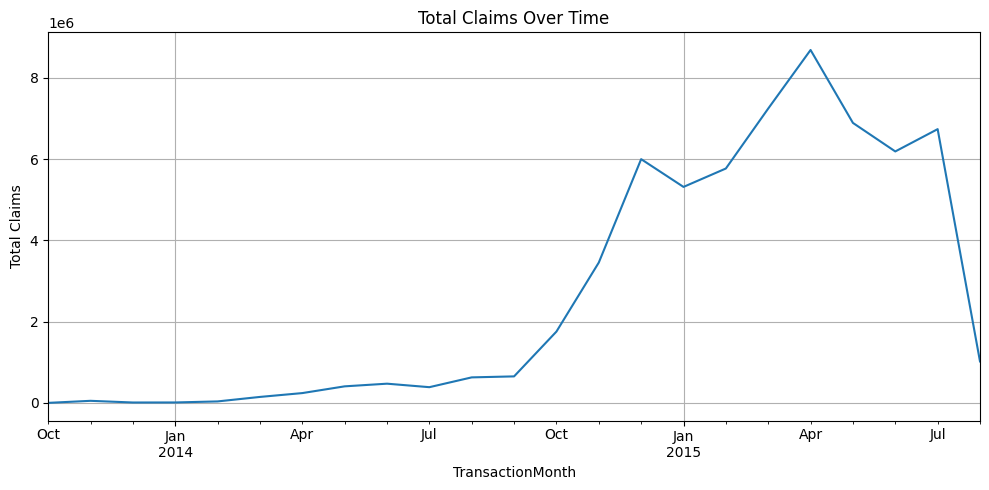

In [68]:
monthly['TotalClaims'].plot(title='Total Claims Over Time', figsize=(10, 5))
plt.ylabel('Total Claims')
plt.grid(True)
plt.tight_layout()
plt.show()


Distribution of CustomValueEstimate:

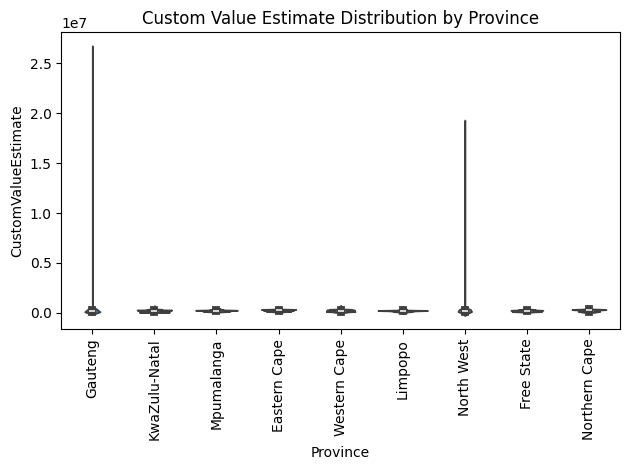

In [69]:
sns.violinplot(x='Province', y='CustomValueEstimate', data=df)
plt.title('Custom Value Estimate Distribution by Province')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [70]:
print("Skewness:")
print("TotalClaims:", df['TotalClaims'].skew())
print("CustomValueEstimate:", df['CustomValueEstimate'].skew())


Skewness:
TotalClaims: 56.546291590996
CustomValueEstimate: 34.90431639024472


In [73]:
import numpy as np
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'TotalClaims': [1000, -20, 0, np.nan]})

# Safe log1p transformation
df['LogClaims'] = df['TotalClaims'].apply(lambda x: np.log1p(x) if pd.notnull(x) and x > -1 else np.nan)


In [ ]:
df['TotalClaims'].describe()
df['TotalClaims'].isnull().sum()
(df['TotalClaims'] < 0).sum()

np.int64(1)